# Spot.jl 

Spot.jl is a wrapper for the [Spot](https://spot.lrde.epita.fr/index.html) library. 

It is using [Cxx.jl](https://github.com/JuliaInterop/Cxx.jl) under the hood and any Spot function can be used in Julia via the Cxx interface. A few functions have been reimplemented to manipulate automatas as pure Julia objects (e.g. `DeterministicRabinAutomata`). 

For more extensive tutorials see the original [Spot documentation](https://spot.lrde.epita.fr/tut.html).


In [1]:
using Spot

┌ Info: Precompiling Spot [f11abc24-ce50-11e8-2475-af6658d13f2b]
└ @ Base loading.jl:1242
┌ Info: Skipping precompilation since __precompile__(false). Importing Spot [f11abc24-ce50-11e8-2475-af6658d13f2b].
└ @ Base loading.jl:1017


## LTL Formulas

In [2]:
safety = ltl"!crash U goal" 
surveillance = ltl"G (F (a & (F (b & Fc))))" 

"GF(a & F(b & Fc))"

## Conversion to Automata

use the `LTLtranslator` constructor to specify the translation options, then use the `translate` to convert the LTL formula into an automata.

`LTLTranslator`:
- `tgba::Bool = true`  outputs Transition-based Generalized Büchi Automata
- `buchi::Bool = false` outputs state-based Büchi automata
- `monitor::Bool = false` outputs monitors
- `deterministic::Bool = true` combined with generic, will do whatever it takes to produce a deterministic automaton, and may use any acceptance condition
- `generic::Bool = true` 
- `parity::Bool = true` combined with deterministic, will produce a deterministic automaton with parity acceptance
- `state_based_acceptance::Bool` = true define the acceptance using states

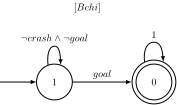

In [3]:
translator = LTLTranslator()
safety_aut = translate(translator, safety)

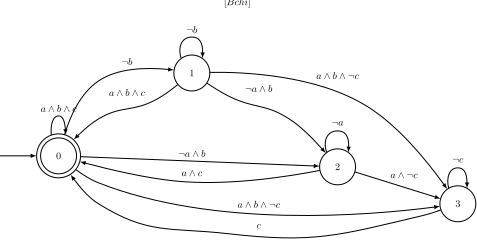

In [4]:
translator = LTLTranslator(buchi=true, deterministic=true, state_based_acceptance=true)
surveillance_aut = translate(translator, surveillance)

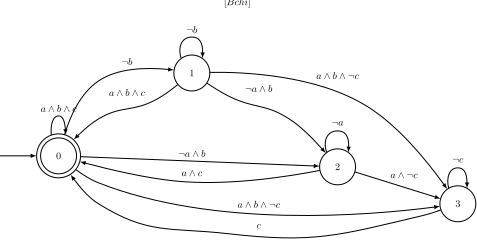

In [5]:
plot_automata(surveillance_aut)

## Deterministic Rabin Automata

Spot.jl provides a Deterministic Rabin Automata structure which is pure Julia. It can be constructed directly from a LTL formula.

In [6]:
dra = DeterministicRabinAutomata(surveillance)
nextstate(dra, 4, (:a,:b,:c))

1